In [230]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time
import json
import scipy.stats as st

In [231]:
player_list = ['Michael Jordan', 'Kobe Bryant', 'LeBron James', 'Magic Johnson', 'Larry Bird', 'Bill Russell', 
               'Wilt Chamberlain', 'Kareem Abdul-Jabbar', "Shaquille O'Neal", 'Stephen Curry' ]

In [232]:
#define functions

#this function takes the 1 row career stats df from the csv and prepares it for merging
def career_cleaner(df, name):
    df = df.reset_index(drop = True)
    df = df.rename(index = {0 : name})
    df = df.transpose()
    df.index.name = "Stats"
    return df

#this function uses the player_df and takes a category and uses it to sort and assign points 
#to the players from greatest to least according to that category
def points_assigner(category):
    df = player_df.sort_values(category, ascending = False)
    points = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
    df[category + " PTS"] = points
    df = df.reset_index()
    df = df.rename(columns = {"index": "Players"})
    df = df[["Players", category + " PTS"]]
    return df

In [233]:
#import data sets and save the career stats line in each players' df
jordan_career = pd.read_csv(r"csv_files/jordan_career.csv")
jordan_career = jordan_career.iloc[[-4], ]

kobe_career = pd.read_csv(r"csv_files/kobe_career.csv")
kobe_career = kobe_career.iloc[[-1], ]

lebron_career = pd.read_csv(r"csv_files/lebron_career.csv")
lebron_career = lebron_career.iloc[[-5], ]

magic_career = pd.read_csv(r"csv_files/magic_career.csv")
magic_career = magic_career.iloc[[-1], ]

bird_career = pd.read_csv(r"csv_files/bird_career.csv")
bird_career = bird_career.iloc[[-1], ]

russell_career = pd.read_csv(r"csv_files/russell_career.csv")
russell_career = russell_career.iloc[[-1], ]

wilt_career = pd.read_csv(r"csv_files/wilt_career.csv")
wilt_career = wilt_career.iloc[[-5], ]

kareem_career = pd.read_csv(r"csv_files/kareem_career.csv")
kareem_career = kareem_career.iloc[[-4], ]

shaq_career = pd.read_csv(r"csv_files/shaq_career.csv")
shaq_career = shaq_career.iloc[[-8], ]

steph_career = pd.read_csv(r"csv_files/steph_career.csv")
steph_career = steph_career.iloc[[-1], ]

In [234]:
#clean functions for merging
jordan_career = career_cleaner(jordan_career, "Michael Jordan")
kobe_career = career_cleaner(kobe_career, "Kobe Bryant")
lebron_career = career_cleaner(lebron_career, "LeBron James")
magic_career = career_cleaner(magic_career, "Magic Johnson")
bird_career = career_cleaner(bird_career, "Larry Bird")
russell_career = career_cleaner(russell_career, "Bill Russell")
wilt_career = career_cleaner(wilt_career, "Wilt Chamberlain")
kareem_career = career_cleaner(kareem_career, "Kareem Abdul-Jabbar")
shaq_career = career_cleaner(shaq_career, "Shaquille O'Neal")
steph_career = career_cleaner(steph_career, "Stephen Curry")

In [235]:
#merge all career data together
vert_df = jordan_career.merge(kobe_career, on = "Stats")
vert_df = vert_df.merge(lebron_career, on = "Stats")
vert_df = vert_df.merge(magic_career, on = "Stats")
vert_df = vert_df.merge(bird_career, on = "Stats")
vert_df = vert_df.merge(russell_career, on = "Stats", how = "outer")
vert_df = vert_df.merge(wilt_career, on = "Stats", how = "outer")
vert_df = vert_df.merge(kareem_career, on = "Stats")
vert_df = vert_df.merge(shaq_career, on = "Stats")
vert_df = vert_df.merge(steph_career, on = "Stats")

In [236]:
#delete unnecessary statistics
vert_df = vert_df.drop(["Tm", "GS", "Lg", "MP", "Age", "Pos", "FG", "FGA", "3P", "3PA", "2P", "2PA", "2P%", "eFG%", "FT", "FTA", "ORB", "DRB", "TOV", "PF"])

In [237]:
#organize the df to have player names as indexes and stats as columns
player_df = vert_df.transpose()

In [238]:
#Assigning zeros to both Wilt and Russell for their 3 point percentages
player_df.loc["Bill Russell", "3P%"] = 0
player_df.loc["Wilt Chamberlain", "3P%"] = 0

#Assigning the correct stat of blocks for both Wilt and Russell
player_df.loc["Bill Russell", "BLK"] = 8.1
player_df.loc["Wilt Chamberlain", "BLK"] = 8.8

#Assigning the correct stat of steals for both Wilt and Russell
player_df.loc["Bill Russell", "STL"] = 1.5
player_df.loc["Wilt Chamberlain", "STL"] = 1.5

In [239]:
#display dataframe
player_df

Stats,Season,G,FG%,3P%,FT%,TRB,AST,STL,BLK,PTS
Michael Jordan,Career,1072,0.497,0.327,0.835,6.2,5.3,2.3,0.8,30.1
Kobe Bryant,Career,1346,0.447,0.329,0.837,5.2,4.7,1.4,0.5,25
LeBron James,Career,1258,0.504,0.344,0.735,7.4,7.4,1.6,0.8,27.1
Magic Johnson,Career,906,0.52,0.303,0.848,7.2,11.2,1.9,0.4,19.5
Larry Bird,Career,897,0.496,0.376,0.886,10,6.3,1.7,0.8,24.3
Bill Russell,Career,963,0.44,0,0.561,22.5,4.3,1.5,8.1,15.1
Wilt Chamberlain,Career,1045,0.54,0,0.511,22.9,4.4,1.5,8.8,30.1
Kareem Abdul-Jabbar,Career,1560,0.559,0.056,0.721,11.2,3.6,0.9,2.6,24.6
Shaquille O'Neal,Career,1207,0.582,0.045,0.527,10.9,2.5,0.6,2.3,23.7
Stephen Curry,Career,699,0.476,0.435,0.906,4.5,6.6,1.7,0.2,23.5


In [335]:
#Creating scoreboard
scoreboard_df = pd.DataFrame({
    "Players" : player_list})

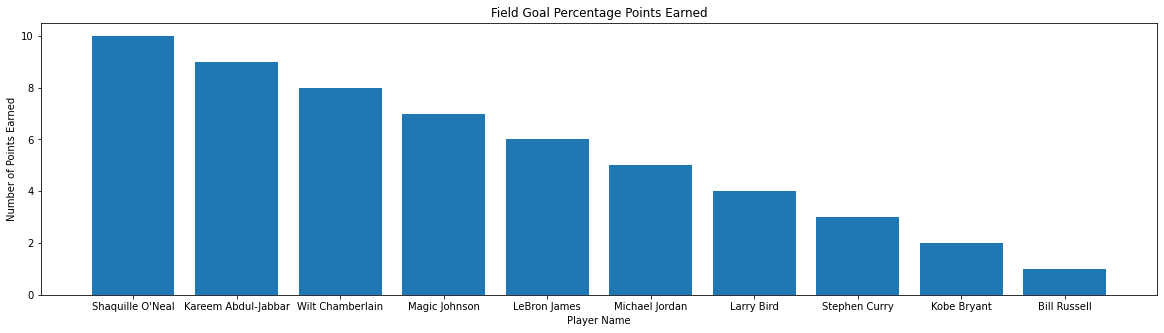

In [336]:
#Determine who has the highest field goal percentage
temp = points_assigner("FG%")
scoreboard_df = scoreboard_df.merge(temp, on = "Players", how = "right")

#creating graph of field goal percentages
plt.figure(figsize = (20,5))
plt.title("Field Goal Percentage Points Earned")
plt.bar(temp.Players, temp["FG% PTS"])
plt.xlabel("Player Name")
plt.ylabel("Number of Points Earned")

plt.savefig("output/field_goal_percentage_pts_earned")
plt.show()

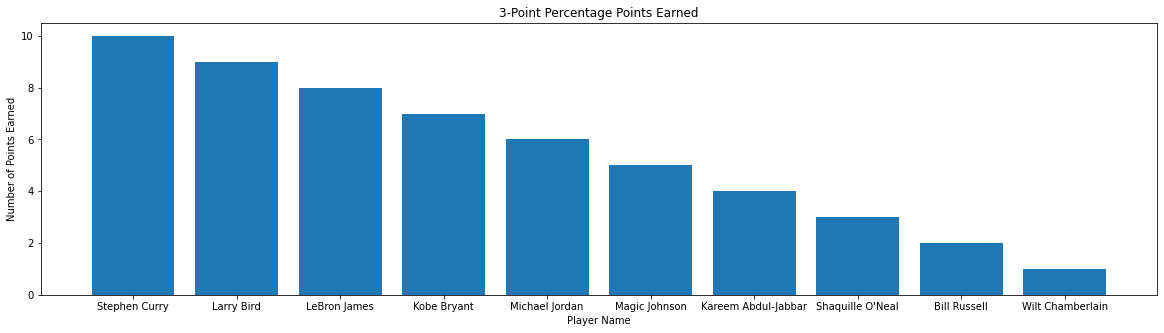

In [337]:
#Determine who has the highest 3-point percentage
temp = points_assigner("3P%")
scoreboard_df = scoreboard_df.merge(temp, on = "Players", how = "right")

#creating graph of 3-point percentages
plt.figure(figsize = (20,5))
plt.title("3-Point Percentage Points Earned")
plt.bar(temp.Players, temp["3P% PTS"])
plt.xlabel("Player Name")
plt.ylabel("Number of Points Earned")

plt.savefig("output/3p_percentage_pts_earned")
plt.show()

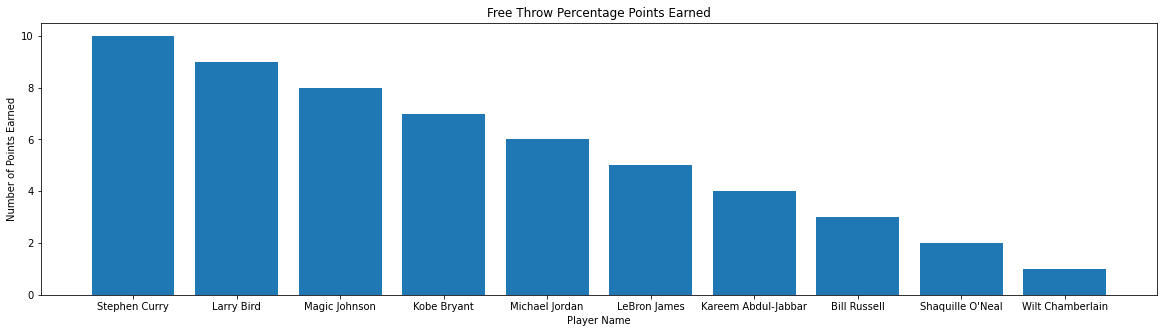

In [338]:
#Determine who has the highest free throw percentage
temp = points_assigner("FT%")
scoreboard_df = scoreboard_df.merge(temp, on = "Players", how = "right")

#creating graph of free throw percentages
plt.figure(figsize = (20,5))
plt.title("Free Throw Percentage Points Earned")
plt.bar(temp.Players, temp["FT% PTS"])
plt.xlabel("Player Name")
plt.ylabel("Number of Points Earned")

plt.savefig("output/free_throw_percentage_pts_earned")
plt.show()

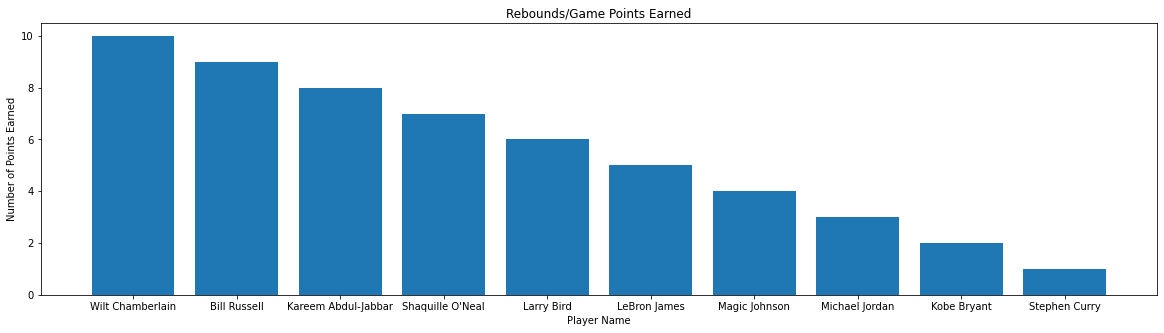

In [339]:
#Determine who has the most rebounds per game
temp = points_assigner("TRB")
scoreboard_df = scoreboard_df.merge(temp, on = "Players", how = "right")

#creating graph of rebound points earned
plt.figure(figsize = (20,5))
plt.title("Rebounds/Game Points Earned")
plt.bar(temp.Players, temp["TRB PTS"])
plt.xlabel("Player Name")
plt.ylabel("Number of Points Earned")

plt.savefig("output/rebound_pts_earned")
plt.show()

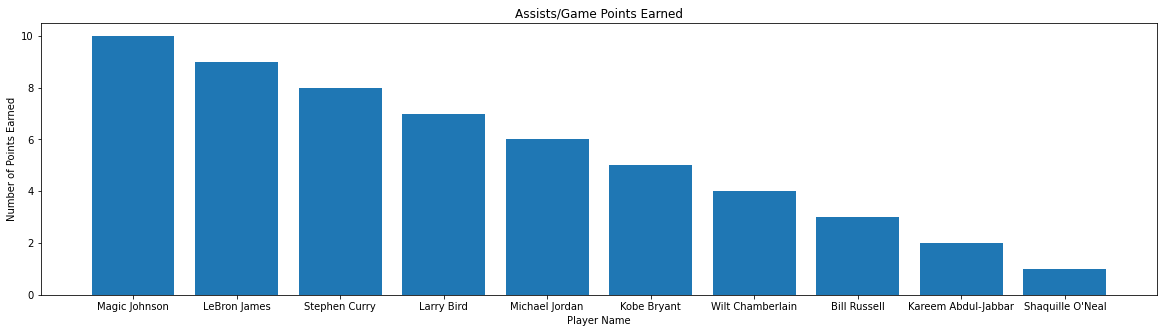

In [340]:
#Determine who has the most assists per game
temp = points_assigner("AST")
scoreboard_df = scoreboard_df.merge(temp, on = "Players", how = "right")

#creating graph of assist points earned
plt.figure(figsize = (20,5))
plt.title("Assists/Game Points Earned")
plt.bar(temp.Players, temp["AST PTS"])
plt.xlabel("Player Name")
plt.ylabel("Number of Points Earned")

plt.savefig("output/assist_pts_earned")
plt.show()

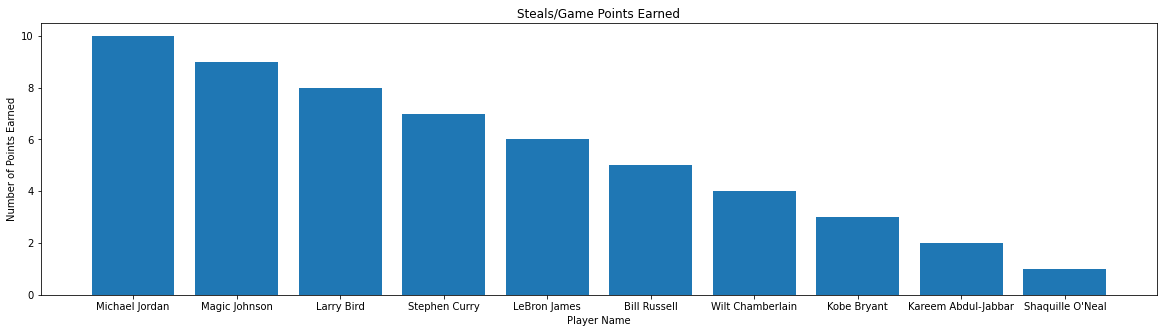

In [341]:
#Determine who has the most steals per game
temp = points_assigner("STL")
scoreboard_df = scoreboard_df.merge(temp, on = "Players", how = "right")

#creating graph of steals points earned
plt.figure(figsize = (20,5))
plt.title("Steals/Game Points Earned")
plt.bar(temp.Players, temp["STL PTS"])
plt.xlabel("Player Name")
plt.ylabel("Number of Points Earned")

plt.savefig("output/steal_pts_earned")
plt.show()

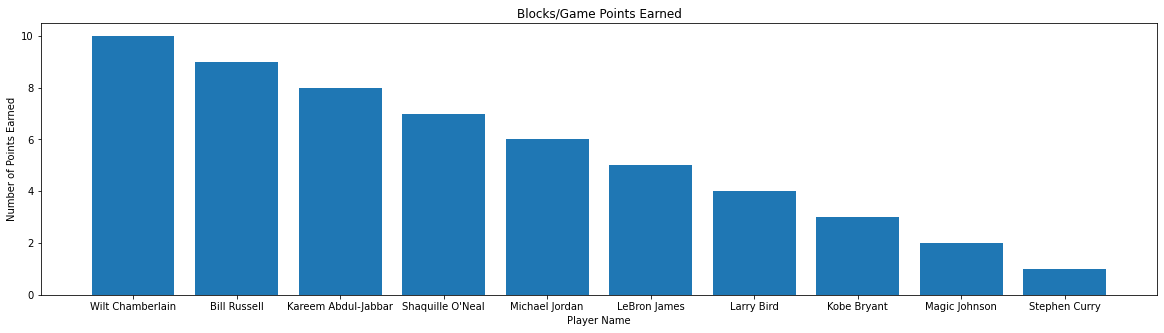

In [342]:
#Determine who has the most blocks per game
temp = points_assigner("BLK")
scoreboard_df = scoreboard_df.merge(temp, on = "Players", how = "right")

#creating graph of blocks points earned
plt.figure(figsize = (20,5))
plt.title("Blocks/Game Points Earned")
plt.bar(temp.Players, temp["BLK PTS"])
plt.xlabel("Player Name")
plt.ylabel("Number of Points Earned")

plt.savefig("output/blocks_pts_earned")
plt.show()

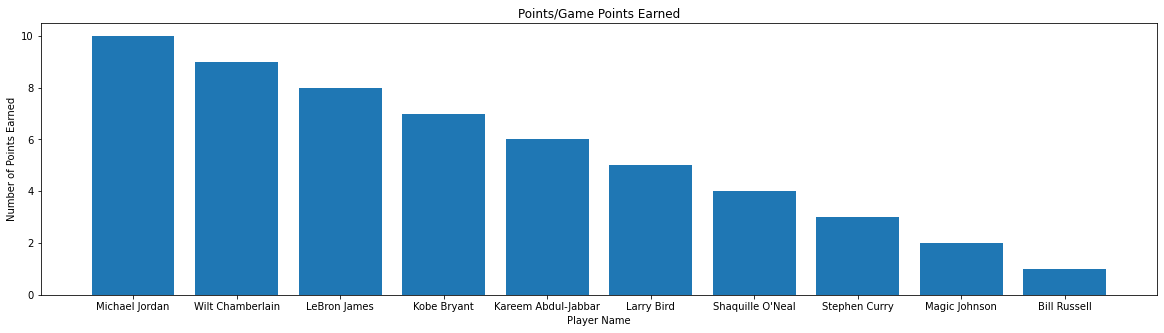

In [343]:
#Determine who has the most points per game
temp = points_assigner("PTS")
scoreboard_df = scoreboard_df.merge(temp, on = "Players", how = "right")

#creating graph of points/game points earned
plt.figure(figsize = (20,5))
plt.title("Points/Game Points Earned")
plt.bar(temp.Players, temp["PTS PTS"])
plt.xlabel("Player Name")
plt.ylabel("Number of Points Earned")

plt.savefig("output/points_pts_earned")
plt.show()

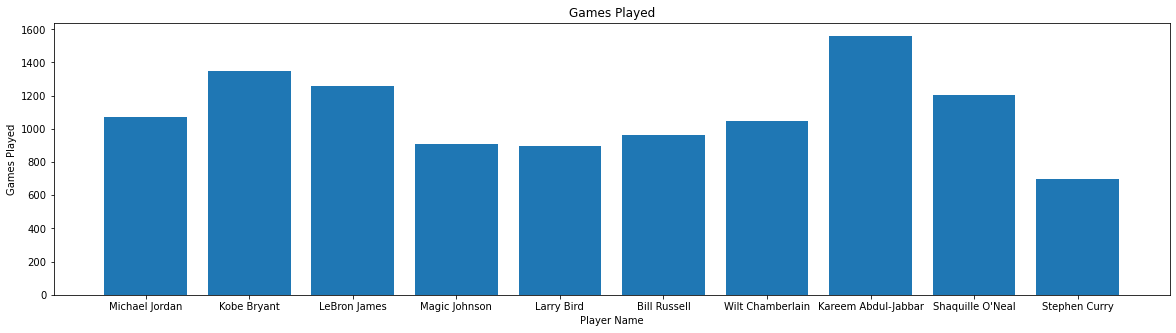

In [345]:
#creating graph games played
plt.figure(figsize = (20,5))
plt.title("Games Played")
plt.bar(player_df.index, player_df["G"])
plt.xlabel("Player Name")
plt.ylabel("Games Played")

plt.savefig("output/games_played")
plt.show()

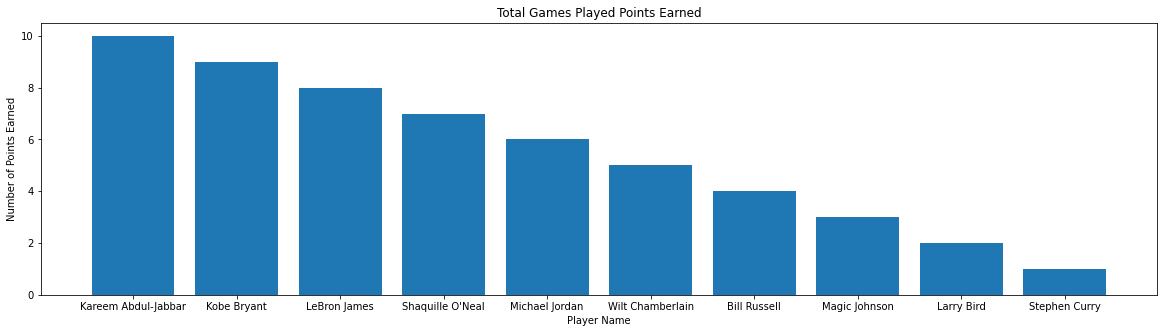

In [346]:
#Determine who played the most games
temp = points_assigner("G")
scoreboard_df = scoreboard_df.merge(temp, on = "Players", how = "right")

#creating graph of field goal percentages
plt.figure(figsize = (20,5))
plt.title("Total Games Played Points Earned")
plt.bar(temp.Players, temp["G PTS"])
plt.xlabel("Player Name")
plt.ylabel("Number of Points Earned")

plt.savefig("output/games_played_pts_earned")
plt.show()

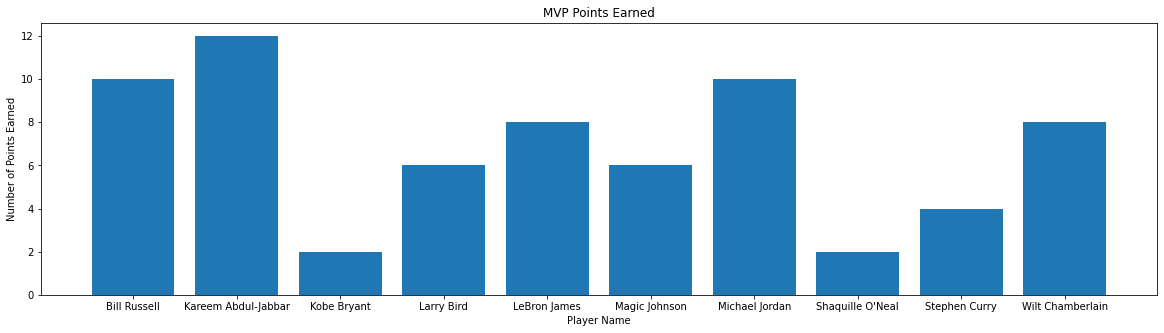

In [347]:
#Determine who had the most MVP awards
mvp_df = pd.read_csv(r"csv_files/mvp_history.csv")

grouped_mvps = mvp_df.groupby("Unnamed: 2").count()
grouped_mvps = grouped_mvps.reset_index()
grouped_mvps = grouped_mvps[["Unnamed: 2", "Unnamed: 0"]]

only_ours = grouped_mvps.loc[grouped_mvps["Unnamed: 2"].isin(player_list)]
only_ours = only_ours.rename(columns = {"Unnamed: 2" : "Players", "Unnamed: 0" : "MVP PTS"})
only_ours["MVP PTS"] = only_ours["MVP PTS"] * 2

scoreboard_df = scoreboard_df.merge(only_ours, on = "Players", how = "right")


#creating graph of who had the most mvp awards
plt.figure(figsize = (20,5))
plt.title("MVP Points Earned")
plt.bar(only_ours.Players, only_ours["MVP PTS"])
plt.xlabel("Player Name")
plt.ylabel("Number of Points Earned")

plt.savefig("output/mvp_pts_earned")
plt.show()

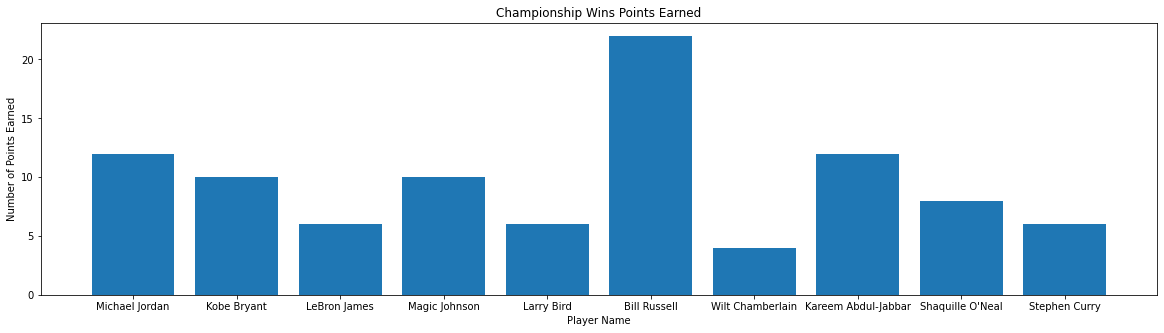

In [355]:
#Determine who had the most championship wins
no_champs = [6, 5, 3, 5, 3, 11, 2, 6, 4, 3]
champ_df = pd.DataFrame({
    "Players" : player_list,
    "CHAMP PTS" : no_champs 
})

champ_df["CHAMP PTS"] = champ_df["CHAMP PTS"] * 2

scoreboard_df = scoreboard_df.merge(champ_df, on = "Players", how = "left")

#creating graph of championship wins points earned
plt.figure(figsize = (20,5))
plt.title("Championship Wins Points Earned")
plt.bar(champ_df.Players, champ_df["CHAMP PTS"])
plt.xlabel("Player Name")
plt.ylabel("Number of Points Earned")

plt.savefig("output/champ_pts_earned")
plt.show()

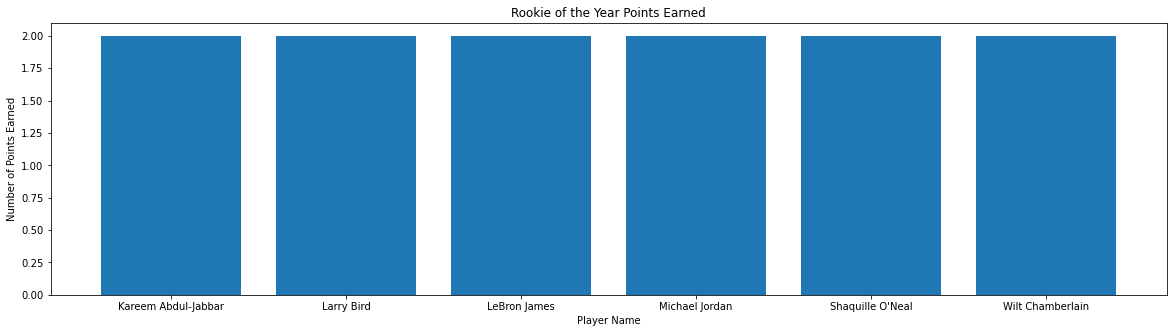

In [356]:
#Determine who won rookie of the year
roy_df = pd.read_csv(r"csv_files/roy_history.csv")
grouped_roy = roy_df.groupby("Unnamed: 2").count()
grouped_roy = grouped_roy.reset_index()
grouped_roy = grouped_roy[["Unnamed: 2", "Unnamed: 0"]]

only_ours = grouped_roy.loc[grouped_roy["Unnamed: 2"].isin(player_list)]
only_ours = only_ours.rename(columns = {"Unnamed: 2" : "Players", "Unnamed: 0" : "ROY PTS"})
only_ours["ROY PTS"] = only_ours["ROY PTS"] * 2

scoreboard_df = scoreboard_df.merge(only_ours, on = "Players", how = "left")
scoreboard_df = scoreboard_df.fillna(0)


#creating graph of rookie of the year points earned
plt.figure(figsize = (20,5))
plt.title("Rookie of the Year Points Earned")
plt.bar(only_ours.Players, only_ours["ROY PTS"])
plt.xlabel("Player Name")
plt.ylabel("Number of Points Earned")

plt.savefig("output/roy_pts_earned")
plt.show()

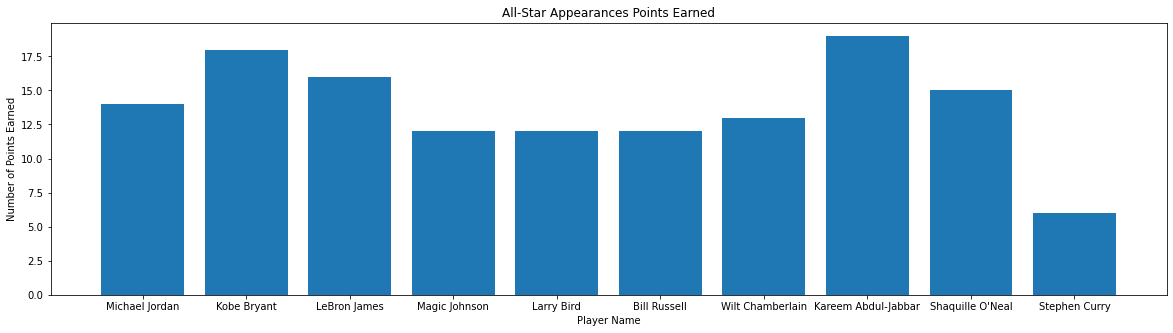

In [357]:
#Determine who has the most all-star appearances
no_allstar_appears = [14, 18, 16, 12, 12, 12, 13, 19, 15, 6]
allst_df = pd.DataFrame({
    "Players" : player_list,
    "ALLSTAR PTS" : no_allstar_appears 
})

allst_df["ALLSTAR PTS"] = allst_df["ALLSTAR PTS"]

scoreboard_df = scoreboard_df.merge(allst_df, on = "Players", how = "left")

#creating graph of all-star appearances points earned
plt.figure(figsize = (20,5))
plt.title("All-Star Appearances Points Earned")
plt.bar(allst_df.Players, allst_df["ALLSTAR PTS"])
plt.xlabel("Player Name")
plt.ylabel("Number of Points Earned")

plt.savefig("output/allstar_pts_earned")
plt.show()

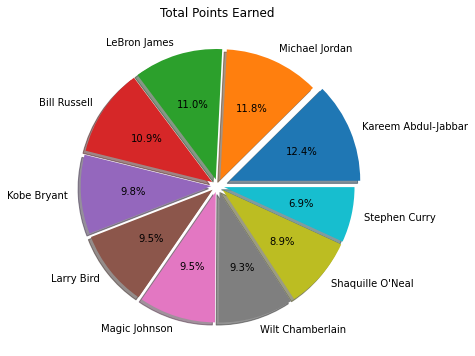

In [383]:
#Determine who is the best overall player
scoreboard_df["TOTAL PTS"] = scoreboard_df.sum(axis = 1)
scoreboard_df = scoreboard_df.sort_values("TOTAL PTS", ascending = False)
scoreboard_df = scoreboard_df.reset_index(drop = True)

#creating graph of best player
plt.figure(figsize = (12,6))
plt.title("Total Points Earned")
plt.pie(scoreboard_df["TOTAL PTS"], explode = (.1, .05, .05, .05, .05, .05, .05, .05, .05, .05), 
        labels = scoreboard_df.Players, shadow = True, autopct = "%1.1f%%")
#plt.xlabel("Player Name")
#plt.ylabel("Number of Points Earned")

#plt.savefig("output/roy_pts_earned")
plt.show()

In [352]:
#display final scoreboard
scoreboard_df

,Players,FG% PTS,3P% PTS,FT% PTS,TRB PTS,AST PTS,STL PTS,BLK PTS,PTS PTS,G PTS,MVP PTS,CHAMP PTS,ROY PTS,ALLSTAR PTS,TOTAL PTS
0,Kareem Abdul-Jabbar,9,4,4,8,2,2,8,6,10,12,12,2.0,19,98.0
1,Michael Jordan,5,6,6,3,6,10,6,10,6,10,12,2.0,14,96.0
2,LeBron James,6,8,5,5,9,6,5,8,8,8,6,2.0,16,92.0
3,Bill Russell,1,2,3,9,3,5,9,1,4,10,22,0.0,12,81.0
4,Larry Bird,4,9,9,6,7,8,4,5,2,6,6,2.0,12,80.0
5,Wilt Chamberlain,8,1,1,10,4,4,10,9,5,8,4,2.0,13,79.0
6,Magic Johnson,7,5,8,4,10,9,2,2,3,6,10,0.0,12,78.0
7,Kobe Bryant,2,7,7,2,5,3,3,7,9,2,10,0.0,18,75.0
8,Shaquille O'Neal,10,3,2,7,1,1,7,4,7,2,8,2.0,15,69.0
9,Stephen Curry,3,10,10,1,8,7,1,3,1,4,6,0.0,6,60.0


In [353]:
#declare the victor
print(f'The greatest NBA player of all time is {scoreboard_df.iloc[0,0]}!')

The greatest NBA player of all time is Kareem Abdul-Jabbar!


In [354]:
#Map of markers of location of where each players played